In [191]:
import pandas as pd

In [192]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [193]:
# convertendo os dados categóricos em numéricos
df_ = pd.get_dummies(df)

# removendo os dados nulos
df_.dropna(inplace=True)

#remover coluna id
df_.drop('id', axis=1, inplace=True)

df_.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
2,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,174.12,24.0,1,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
5,81.0,0,0,186.21,29.0,1,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False


In [194]:
# Hipótese nula
df_.stroke.value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

In [195]:
# calcular a acurácia de um modelo que sempre preveja que o paciente não teve stroke
acuracia_nulo = df_.stroke.value_counts()[0] / df_.stroke.value_counts().sum()
print(f'A acurácia do modelo é {acuracia_nulo * 100 :.2f} %')


A acurácia do modelo é 95.74 %


In [196]:
#Treino e Teste

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

y = df_['stroke']
x = df_.drop(['stroke'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



y_test.value_counts(True)

stroke
0    0.946029
1    0.053971
Name: proportion, dtype: float64

In [197]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

#calcule a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print(f'A acurácia do modelo é {acuracia * 100 :.2f} %')
print(f'A acurácia nulo do modelo é {acuracia_nulo * 100 :.2f} %')


A acurácia do modelo é 91.45 %
A acurácia nulo do modelo é 95.74 %


In [198]:
# import gridsearch implement paramgrid

from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, 11, 13],
    'min_samples_split': [2, 4, 6, 8, 10, 12],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='recall')
grid_search.fit(x_train, y_train)

# print best params

grid_search.best_params_

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=6; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=8; total time=   0.0s[CV] END criterion=gini, max_depth=3, min_samples_leaf=

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [199]:
# Acuracia do best estimator

best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(x_test)
acuracia = accuracy_score(y_test, y_pred)
print(f'A acurácia do modelo é {acuracia * 100 :.2f} %')
print(f'A acurácia nulo do modelo é {acuracia_nulo * 100 :.2f} %')

A acurácia do modelo é 92.26 %
A acurácia nulo do modelo é 95.74 %


In [200]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[899,  30],
       [ 46,   7]])

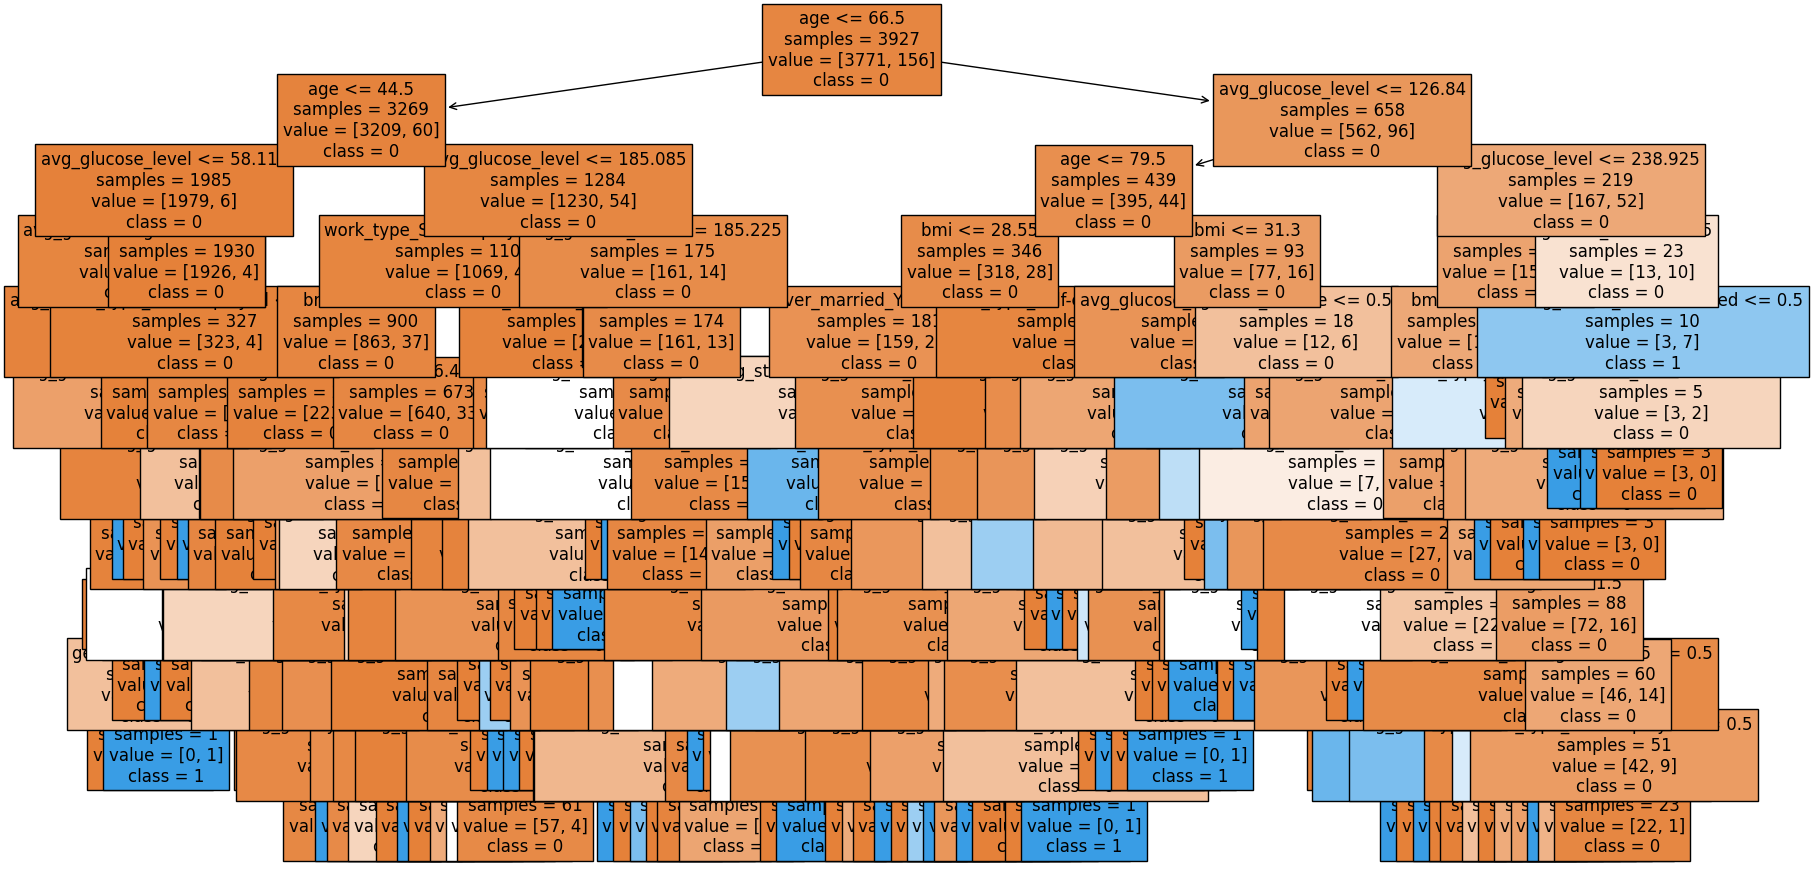

In [201]:
# plotando a árvore de decisão
import matplotlib.pyplot as plt
figura = plt.figure(figsize=(20,11))
_ = tree.plot_tree(best_estimator, 
                   feature_names=x.columns,  
                   class_names=['0','1'],
                   filled=True,
                   node_ids=False,
                   impurity=False,
                    fontsize=12)
plt.show()


In [221]:
#Feature importance from best estimator
importances = best_estimator.feature_importances_
importances

array([0.17805896, 0.01161782, 0.01181583, 0.28478845, 0.18334356,
       0.01986396, 0.07110371, 0.        , 0.        , 0.01087522,
       0.00632831, 0.        , 0.0097723 , 0.02717835, 0.        ,
       0.00666746, 0.01840494, 0.03822301, 0.00126687, 0.07130467,
       0.04938658])

In [222]:
# Conecting to features

feature_importances_tree = pd.DataFrame(importances, index=x_train.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances_tree = feature_importances_tree[feature_importances_tree.importance != 0]
feature_importances_tree

,importance
avg_glucose_level,0.284788
bmi,0.183344
age,0.178059
smoking_status_never smoked,0.071305
gender_Male,0.071104
smoking_status_smokes,0.049387
smoking_status_Unknown,0.038223
work_type_Self-employed,0.027178
gender_Female,0.019864
Residence_type_Urban,0.018405


In [204]:
# Ridge Classifier
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier()
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)
acuracia = accuracy_score(y_test, y_pred)

print(f'A acurácia do modelo é {acuracia * 100 :.2f} %')
print(f'A acurácia nulo do modelo é {acuracia_nulo * 100 :.2f} %')



A acurácia do modelo é 94.60 %
A acurácia nulo do modelo é 95.74 %


In [205]:
#matriz de confusão
confusion_matrix(y_test, y_pred)

array([[929,   0],
       [ 53,   0]])

In [206]:
# gridsearch

param_grid_ridge = {
    'alpha': [0.1, 0.5, 1, 2, 3, 4, 5, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=3, n_jobs=-1, verbose=2, scoring='recall')
grid_search_ridge.fit(x_train, y_train)

# print best params

grid_search_ridge.best_params_


Fitting 3 folds for each of 63 candidates, totalling 189 fits
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END .........................alpha=0.1, solver=cholesky; total time=   0.0s
[CV] END .........................alpha=0.1, solver=cholesky; total time=   0.0s
[CV] END .........................alpha=0.1, solver=cholesky; total time=   0.0s
[CV] END .............................alpha=0.1, solver=lsqr; total time=   0.0s
[CV] END .............................alpha=0.1, solver=lsqr; total time=   0.0s
[CV] END .............................alpha=0.1

/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: T

[CV] END .............................alpha=0.5, solver=saga; total time=   1.0s
[CV] END ...............................alpha=3, solver=lsqr; total time=   0.0s
[CV] END ..........................alpha=3, solver=sparse_cg; total time=   0.0s
[CV] END ................................alpha=1, solver=sag; total time=   0.9s
[CV] END ...............................alpha=3, solver=lsqr; total time=   0.0s
[CV] END ..........................alpha=3, solver=sparse_cg; total time=   0.0s
[CV] END ...............................alpha=3, solver=lsqr; total time=   0.0s
[CV] END ..........................alpha=3, solver=sparse_cg; total time=   0.0s
[CV] END ................................alpha=4, solver=svd; total time=   0.0s
[CV] END ................................alpha=4, solver=svd; total time=   0.0s
[CV] END ...............................alpha=1, solver=saga; total time=   0.9s
[CV] END ................................alpha=4, solver=svd; total time=   0.0s
[CV] END ...................

/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ................................alpha=2, solver=sag; total time=   0.8s
[CV] END ................................alpha=1, solver=sag; total time=   0.8s
[CV] END ..............................alpha=0.5, solver=sag; total time=   0.9s
[CV] END ...............................alpha=1, solver=saga; total time=   0.9s
[CV] END .............................alpha=0.5, solver=saga; total time=   1.0s
[CV] END ...............................alpha=5, solver=auto; total time=   0.0s
[CV] END ...............................alpha=2, solver=auto; total time=   0.0s
[CV] END ...........................alpha=5, solver=cholesky; total time=   0.0s
[CV] END ................................alpha=5, solver=svd; total time=   0.0s
[CV] END ...............................alpha=5, solver=lsqr; total time=   0.0s
[CV] END ................................alpha=3, solver=sag; total time=   0.8s
[CV] END ...........................alpha=5, solver=cholesky; total time=   0.0s
[CV] END ...................

/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: T

[CV] END ...............................alpha=10, solver=svd; total time=   0.0s
[CV] END ................................alpha=3, solver=sag; total time=   0.9s
[CV] END ...............................alpha=10, solver=svd; total time=   0.0s
[CV] END ..............................alpha=10, solver=lsqr; total time=   0.0s
[CV] END ..........................alpha=10, solver=cholesky; total time=   0.0s
[CV] END ..............................alpha=10, solver=lsqr; total time=   0.0s
[CV] END ..........................alpha=10, solver=cholesky; total time=   0.0s
[CV] END ...............................alpha=3, solver=saga; total time=   1.0s
[CV] END .............................alpha=0.5, solver=saga; total time=   1.0s
[CV] END ..............................alpha=10, solver=lsqr; total time=   0.0s
[CV] END ..........................alpha=10, solver=cholesky; total time=   0.0s
[CV] END ...............................alpha=4, solver=auto; total time=   0.0s
[CV] END ...................

/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............................alpha=100, solver=lsqr; total time=   0.0s
[CV] END ........................alpha=100, solver=sparse_cg; total time=   0.0s
[CV] END ........................alpha=100, solver=sparse_cg; total time=   0.0s
[CV] END ........................alpha=100, solver=sparse_cg; total time=   0.0s
[CV] END ..............................alpha=100, solver=sag; total time=   0.5s
[CV] END ..............................alpha=100, solver=sag; total time=   0.5s
[CV] END ................................alpha=3, solver=sag; total time=   0.8s
[CV] END ..............................alpha=100, solver=sag; total time=   0.5s
[CV] END ...............................alpha=2, solver=saga; total time=   1.0s
[CV] END ................................alpha=5, solver=sag; total time=   0.9s
[CV] END ...............................alpha=10, solver=sag; total time=   0.8s
[CV] END ................................alpha=2, solver=sag; total time=   0.9s
[CV] END ...................

/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...............................alpha=4, solver=saga; total time=   1.1s
[CV] END ................................alpha=4, solver=sag; total time=   0.8s
[CV] END ...............................alpha=5, solver=saga; total time=   1.1s


/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .............................alpha=100, solver=saga; total time=   0.8s
[CV] END .............................alpha=100, solver=saga; total time=   0.8s
[CV] END ................................alpha=5, solver=sag; total time=   0.7s
[CV] END .............................alpha=100, solver=saga; total time=   0.9s
[CV] END ...............................alpha=10, solver=sag; total time=   0.7s
[CV] END ...............................alpha=3, solver=saga; total time=   0.9s
[CV] END ................................alpha=4, solver=sag; total time=   0.7s
[CV] END ...............................alpha=2, solver=saga; total time=   0.9s
[CV] END ..............................alpha=10, solver=saga; total time=   0.8s


/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: T

[CV] END ...............................alpha=4, solver=saga; total time=   0.8s
[CV] END ...............................alpha=5, solver=auto; total time=   0.0s
[CV] END ...............................alpha=5, solver=auto; total time=   0.0s
[CV] END ...............................alpha=5, solver=saga; total time=   0.8s
[CV] END ................................alpha=5, solver=sag; total time=   0.4s
[CV] END ...............................alpha=3, solver=saga; total time=   0.5s
[CV] END ...............................alpha=2, solver=saga; total time=   0.5s
[CV] END ...............................alpha=4, solver=saga; total time=   0.5s
[CV] END ..............................alpha=10, solver=saga; total time=   0.5s


/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: T

[CV] END ...............................alpha=5, solver=saga; total time=   0.5s
[CV] END ..............................alpha=10, solver=auto; total time=   0.0s
[CV] END ..............................alpha=10, solver=saga; total time=   0.5s


/Users/mfstabile/Documents/Insper/AlgLin/2023-2/env/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'alpha': 0.1, 'solver': 'auto'}

In [207]:
# Acuracia do best estimator

best_estimator_ridge = grid_search_ridge.best_estimator_
y_pred = best_estimator_ridge.predict(x_test)
acuracia = accuracy_score(y_test, y_pred)
print(f'A acurácia do modelo é {acuracia * 100 :.2f} %')
print(f'A acurácia nulo do modelo é {acuracia_nulo * 100 :.2f} %')


A acurácia do modelo é 94.60 %
A acurácia nulo do modelo é 95.74 %


In [223]:
# Importances
import numpy as np
importances = best_estimator_ridge.coef_
feature_importances_ridge = pd.DataFrame(np.sign(importances.T), index=x_train.columns, columns=['Increases Stroke Chance']).sort_values('Increases Stroke Chance', ascending=False)
feature_importances_ridge = feature_importances_ridge[feature_importances_ridge['Increases Stroke Chance'] != 0]
feature_importances_ridge['Increases Stroke Chance'] = feature_importances_ridge['Increases Stroke Chance'].replace({1: 'Yes', -1: 'No'})
feature_importances_ridge

,Increases Stroke Chance
age,Yes
ever_married_No,Yes
smoking_status_formerly smoked,Yes
Residence_type_Urban,Yes
work_type_children,Yes
work_type_Never_worked,Yes
hypertension,Yes
smoking_status_smokes,Yes
gender_Male,Yes
gender_Female,Yes


In [208]:
# Classificador Linear
import autograd.numpy as np_
import numpy as np
from autograd import grad
def accuracy(y_test, y_est):
    return np_.mean(np.sign(y_test)==np.sign(y_est))

def loss( parametros ):
    w, b, pontos, val = parametros
    est = pontos @ w + b
    mse = np_.mean( (est - val)**2)
    return mse


g = grad(loss)

x_train_np = x_train.to_numpy(dtype=np.float64)
y_train_np = y_train.to_numpy(dtype=np.float64)
x_test_np = x_test.to_numpy(dtype=np.float64)
y_test_np = y_test.to_numpy(dtype=np.float64)
y_train_np[y_train_np == 0] = -1
y_test_np[y_test_np == 0] = -1

w = np.random.randn(x_train_np.shape[1], 1).astype(np.float64)
b = 0.0

alpha = 10**-5

for i in range(100):
    grad_ = g( (w, b, x_train_np, y_train_np) )
    w -= alpha * grad_[0]
    b = b - alpha * grad_[1]

print(w)
print(b)
# print(loss( (w, b, x_train_np, y_train_np) ))




[[ 0.59684562]
 [ 0.73598135]
 [-0.23926107]
 [ 0.09749692]
 [-1.32299995]
 [ 1.74634347]
 [-0.91107979]
 [-0.40380265]
 [-0.26806136]
 [-1.9216453 ]
 [-0.26506948]
 [ 0.77541622]
 [-0.22008246]
 [ 0.40045008]
 [ 1.09654795]
 [-0.79153413]
 [-0.46450315]
 [-0.50845732]
 [-1.09992317]
 [ 0.40314541]
 [ 1.98630046]]
0.00038519945325468267


In [209]:
y_pred = x_test_np @ w + b
acuracia = accuracy(y_test_np, y_pred)

print(f'A acurácia do modelo é {acuracia * 100 :.2f} %')
print(f'A acurácia nulo do modelo é {acuracia_nulo * 100 :.2f} %')

A acurácia do modelo é 61.08 %
A acurácia nulo do modelo é 95.74 %


In [210]:
#confusion matrix
print(y_test_np)
confusion_matrix(y_test_np, np.sign(y_pred))



[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1

array([[601, 328],
       [ 12,  41]])

De acordo com o site do governo https://www.gov.br/saude/pt-br/assuntos/saude-de-a-a-z/a/avc,
as fatores de risco de AVC são:
- Hipertensão;
- Diabetes tipo 2;
- Colesterol alto;
- Sobrepeso;
- Obesidade;
- Tabagismo;
- Uso excessivo de álcool;
- Idade avançada;
- Sedentarismo;
- Uso de drogas ilícitas;
- Histórico familiar;
- Ser do sexo masculino.



Vamos conferir se cada um dos modelos que criamos consegue prever o risco de AVC de acordo com os fatores de risco citados acima.

In [224]:
# Arvore De Decisão
feature_importances_tree

,importance
avg_glucose_level,0.284788
bmi,0.183344
age,0.178059
smoking_status_never smoked,0.071305
gender_Male,0.071104
smoking_status_smokes,0.049387
smoking_status_Unknown,0.038223
work_type_Self-employed,0.027178
gender_Female,0.019864
Residence_type_Urban,0.018405


Como conseguimos ver acima, o modelo da arvore de decisão, que foi o que teve o melhor desempenho, indica que os fatores de risco mais importantes são:
- Glucose
- BMI (Peso vs Altura)
- Idade
- Fumante

Esses fatores são parecidos como os fatores de risco citados no site do governo, com exceção do fator de risco "Glucose", que não foi citado no site. Porém, o fator de risco "Glucose" é um fator de risco para diabetes, que é um fator de risco para AVC.

In [225]:
# Ridge Classifier
feature_importances_ridge

,Increases Stroke Chance
age,Yes
ever_married_No,Yes
smoking_status_formerly smoked,Yes
Residence_type_Urban,Yes
work_type_children,Yes
work_type_Never_worked,Yes
hypertension,Yes
smoking_status_smokes,Yes
gender_Male,Yes
gender_Female,Yes


Para o RidgeClassifier, que é um modelo de classificação linear com a mesma lógico do modelo que fizemos em aula,
os fatores de risco de idade, hypertensão, glucose, fumante, e doença cardíaca são os importantes. Novamente, esses fatores são parecidos com os fatores de risco citados no site do governo. 

Um apontamento interessante e um pouco esquisito é o fato do BMI não ser um fator de risco importante para o RidgeClassifier, sendo que ele é um fator de risco importante para o modelo de arvore de decisão (e pro governo).